In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('safety01.csv',encoding="latin-1",sep=";")

In [3]:
data

,#,Time(ms),A/D Counts,Load(kN)
0,0,"-3,869628906",491,"-0,025559"
1,1,"-3,857421875",491,"-0,025559"
2,2,"-3,845214844",497,"0,051117"
3,3,"-3,833007813",495,"0,025559"
4,4,"-3,820800781",494,"0,012779"
...,...,...,...,...
8187,8187,"96,06933594",494,"0,012779"
8188,8188,"96,08154297",492,"-0,012779"
8189,8189,"96,09375",493,0
8190,8190,"96,10595703",493,0


In [4]:
data["Time(ms)"] =data["Time(ms)"].str.replace(",",".")
data["Load(kN)"] = data["Load(kN)"].str.replace(",",".")

In [5]:
data["Time(ms)"]=pd.to_numeric(data["Time(ms)"])
data["Load(kN)"]=pd.to_numeric(data["Load(kN)"])

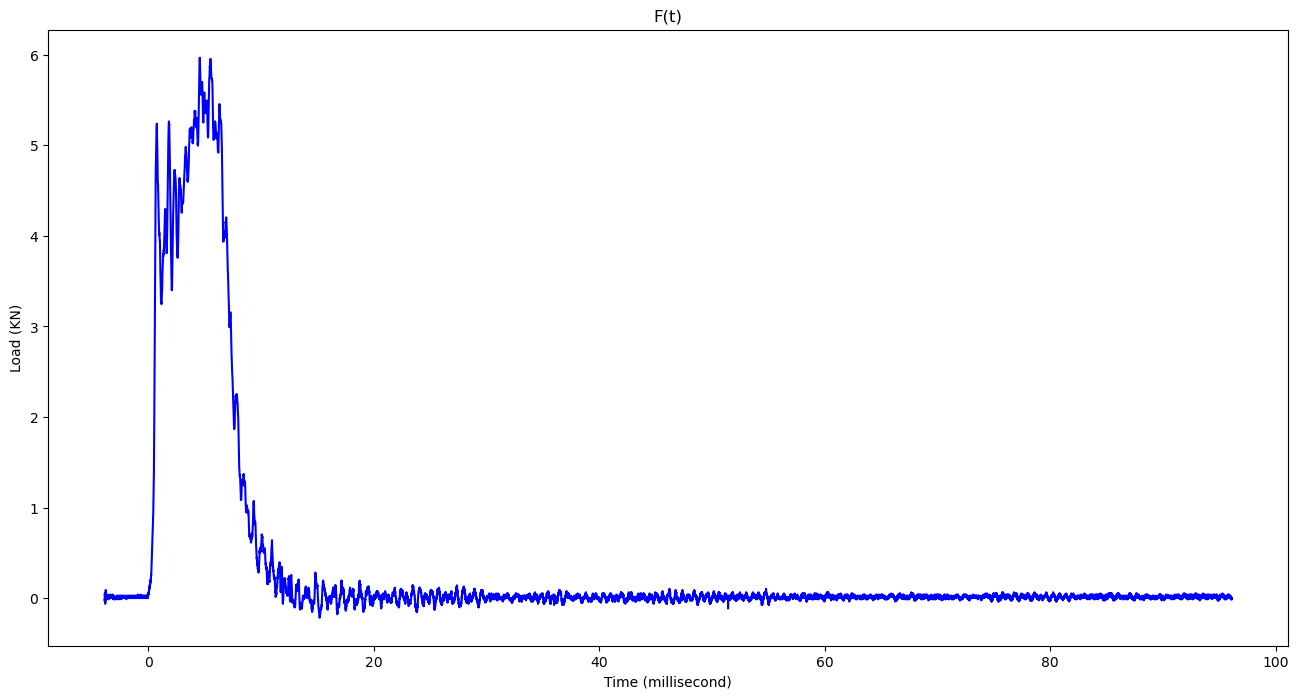

In [6]:
plt.figure(figsize=(16, 8))
plt.plot(data["Time(ms)"], data["Load(kN)"], color="blue")
plt.xlabel("Time (millisecond)")
plt.ylabel("Load (KN)")
plt.title("F(t)")
plt.show()

In [7]:
data = data[(data["Time(ms)"] >= 0) &  (data["Time(ms)"] < 11)]

In [8]:
data["Time(s)"] = data["Time(ms)"]/1000 #from milisecond to second

C:\Users\samio\AppData\Local\Temp\ipykernel_6636\1024493075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Time(s)"] = data["Time(ms)"]/1000 #from milisecond to second


In [9]:
data["Load(N)"] = data["Load(kN)"]*1000 #from kilonewton to newton

C:\Users\samio\AppData\Local\Temp\ipykernel_6636\2941042929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Load(N)"] = data["Load(kN)"]*1000 #from kilonewton to newton


In [10]:
data["Acceleration"] = data["Load(N)"]/8.45 #mass = 8.45 kg

C:\Users\samio\AppData\Local\Temp\ipykernel_6636\2587506974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Acceleration"] = data["Load(N)"]/8.45 #mass = 8.45 kg


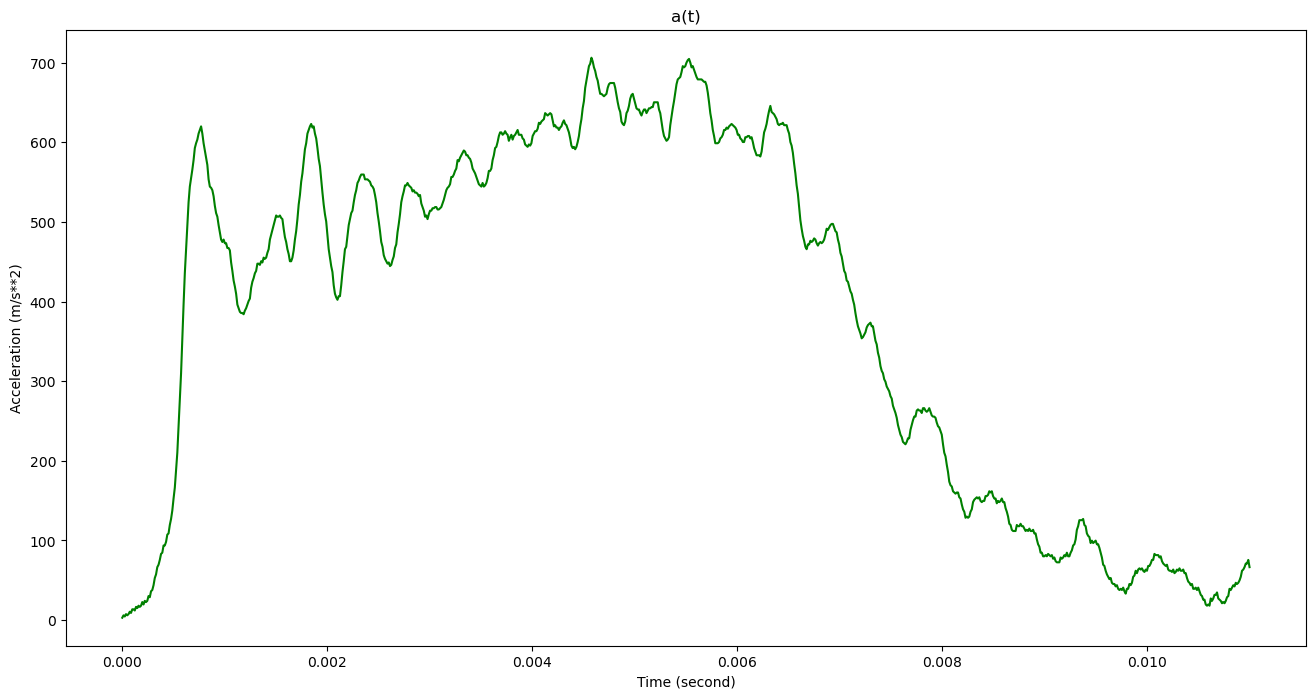

In [11]:
plt.figure(figsize=(16, 8))
plt.plot(data["Time(s)"], data["Acceleration"], color="green")
plt.xlabel("Time (second)")
plt.ylabel("Acceleration (m/s**2)")
plt.title("a(t)")
plt.show()

In [12]:
velocity = data["Acceleration"].diff() * data["Time(s)"][1:]
sum_velocities = velocity.cumsum()
# Integral of acceleration


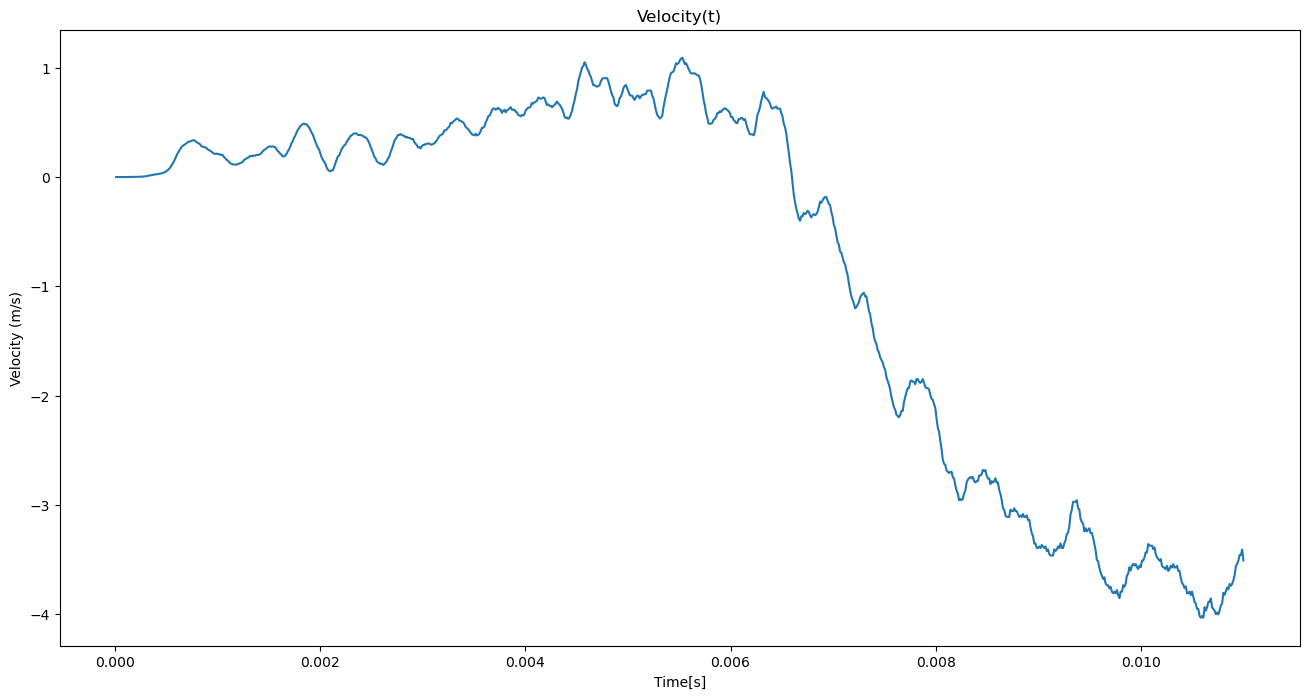

In [13]:
plt.figure(figsize=(16, 8))
plt.plot(data["Time(s)"], sum_velocities)
plt.xlabel("Time[s]")
plt.ylabel('Velocity (m/s)')
plt.title("Velocity(t)")
plt.show()

In [14]:
displacement = sum_velocities.diff() * data["Time(s)"][1:]
sum_displacements = displacement.cumsum()
# Integral of velocity

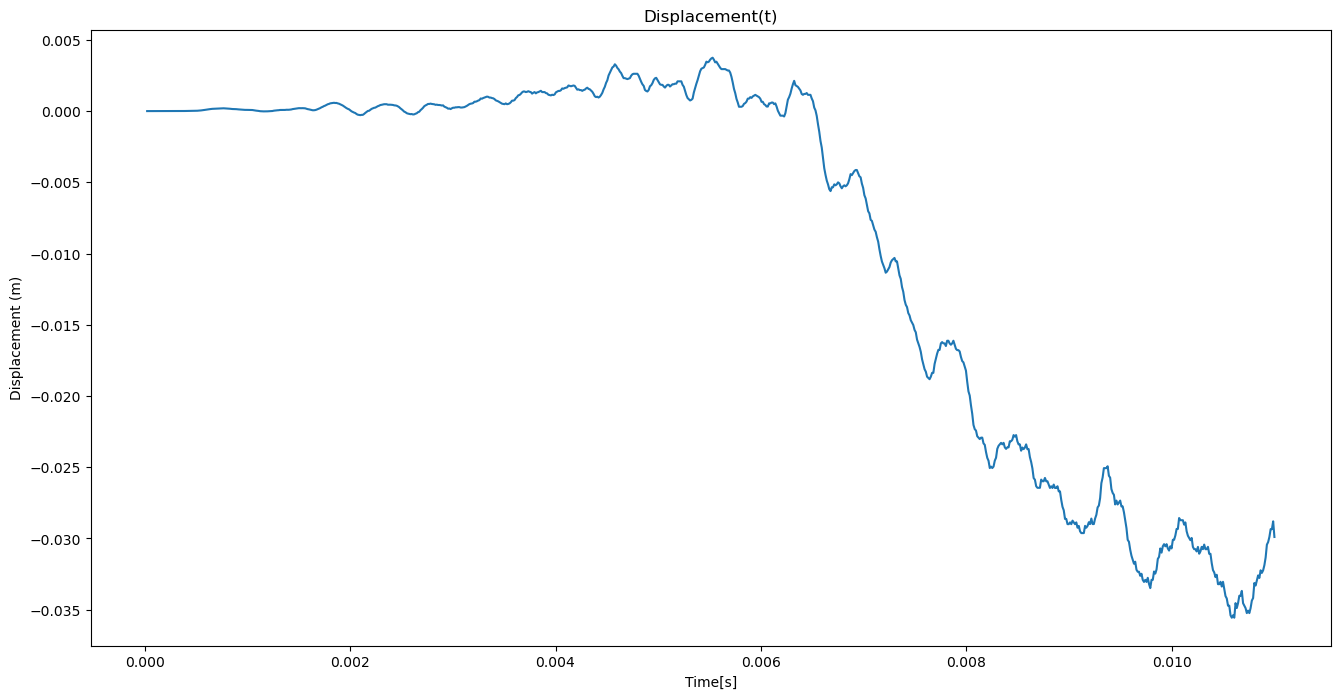

In [15]:
plt.figure(figsize=(16, 8))
plt.plot(data["Time(s)"], sum_displacements)
plt.xlabel("Time[s]")
plt.ylabel('Displacement (m)')
plt.title("Displacement(t)")
plt.show()

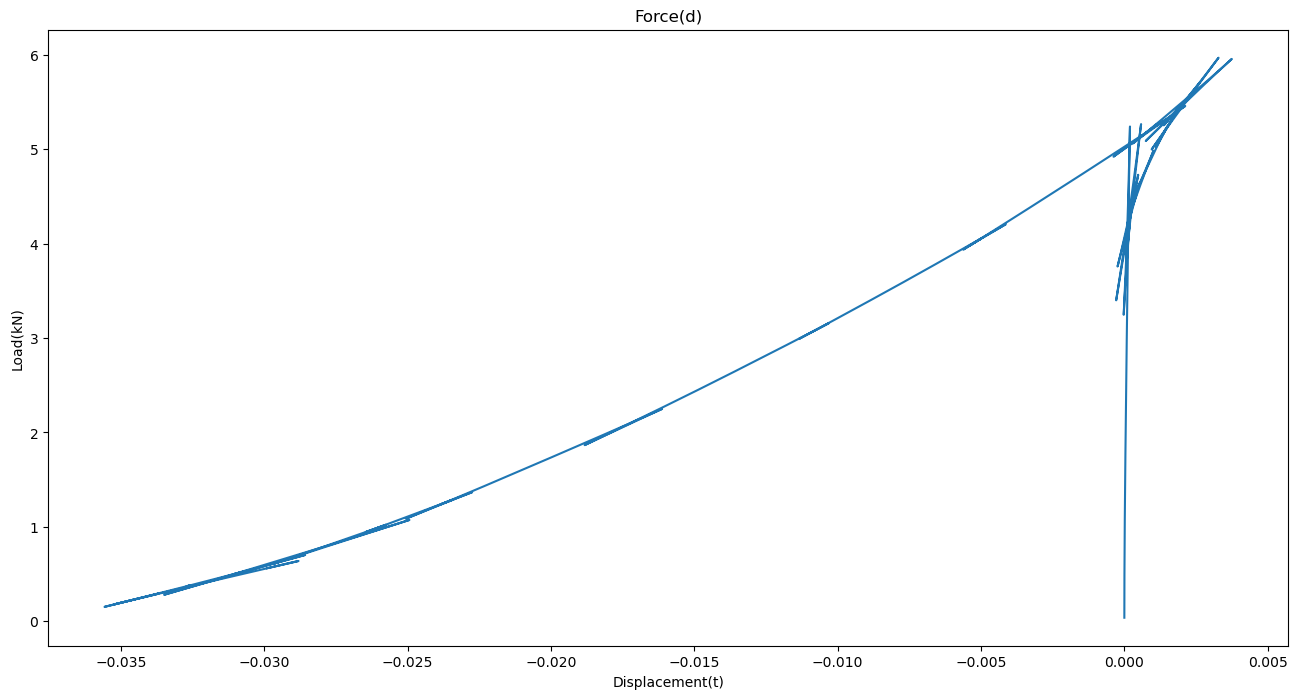

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(sum_displacements, data["Load(kN)"])
plt.xlabel("Displacement(t)")
plt.ylabel('Load(kN)')
plt.title("Force(d)")
plt.show()

In [17]:
#For integrate Force and Displacement Graph
absorbtion = data["Load(kN)"].diff() * sum_displacements[1:]
sum_absorbtions = absorbtion.cumsum()

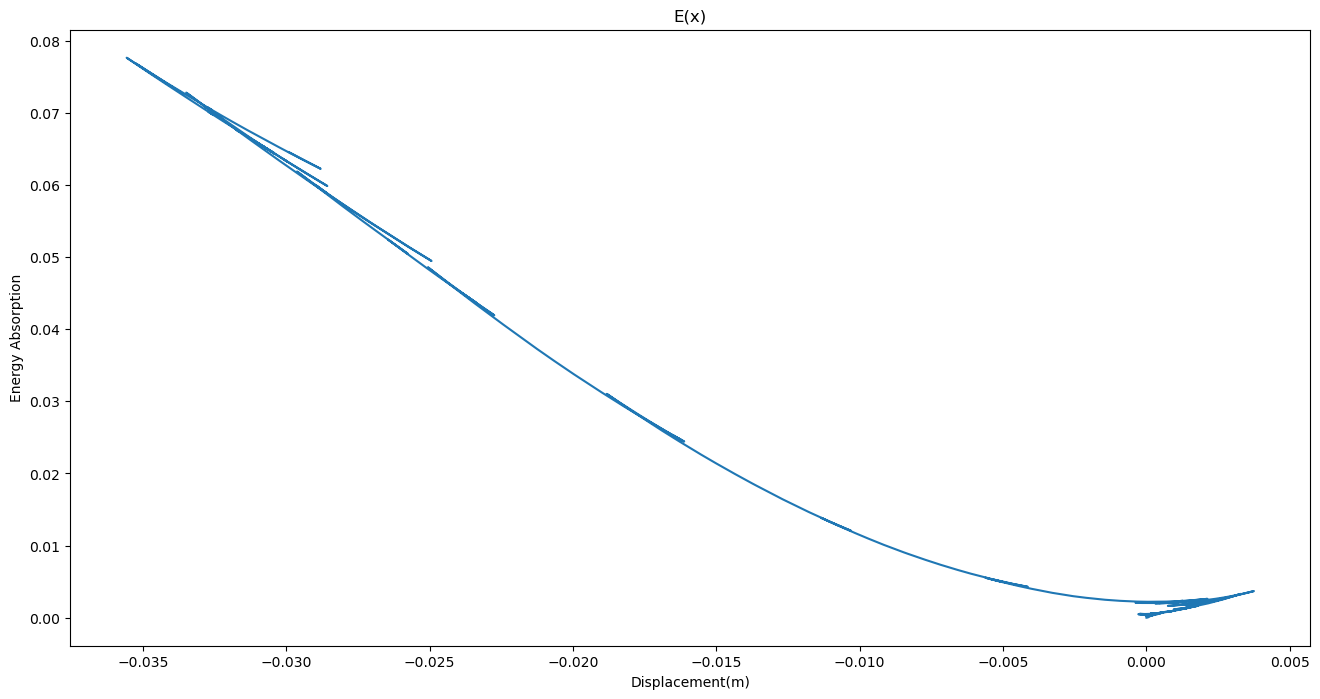

In [18]:
#For Calculation Energy Absorbation , Energy Absorbation is Under the area Force and Displacement Graph
plt.figure(figsize=(16, 8))
plt.plot(sum_displacements, sum_absorbtions)
plt.xlabel("Displacement(m)")
plt.ylabel('Energy Absorption')
plt.title("E(x)")
plt.show()